In [1]:
#Load necessary libraries
import pylab
%pylab inline
import numpy as np
import pandas as pd
import matplotlib as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics


Populating the interactive namespace from numpy and matplotlib


C:\Users\Umar Ibn Ali\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
#load dataset in pandas
df= pd.read_csv("/Users/Umar Ibn Ali/Desktop/FYP/Model/Kuwait_dataset.csv")

In [3]:
#check dataset
df.head()

,Year,GPI,GDP,No of country,Density,Population
0,1991,NaN,28717,2,114.20,45590
1,1992,NaN,31194,2,108.25,44879
2,1993,NaN,35657,3,102.30,30000
3,1994,NaN,39224,6,96.35,30020
4,1995,NaN,43455,5,90.40,3306


In [4]:
df.describe()

,Year,GPI,GDP,No of country,Density,Population
count,26.000000,9.000000,26.000000,26.000000,26.000000,26.000000
mean,2003.500000,1.707222,32880.423077,6.153846,139.257692,10030.884615
std,7.648529,0.067286,8620.835506,3.068450,42.312603,15866.333112
min,1991.000000,1.626000,15108.000000,2.000000,90.400000,50.000000
25%,1997.250000,1.670000,28093.000000,5.000000,108.637500,682.250000
50%,2003.500000,1.691000,32974.500000,5.000000,122.800000,1522.000000
75%,2009.750000,1.705000,39051.500000,7.000000,165.700000,4296.000000
max,2016.000000,1.842000,45994.000000,13.000000,227.400000,45590.000000


In [5]:
#fill column with missing values
df['GPI'].fillna(mean(df.GPI),inplace=True)

In [6]:
#check the columns with missing values
df.apply(lambda x: sum(x.isnull()),axis=0)

Year             0
GPI              0
GDP              0
No of country    0
Density          0
Population       0
dtype: int64

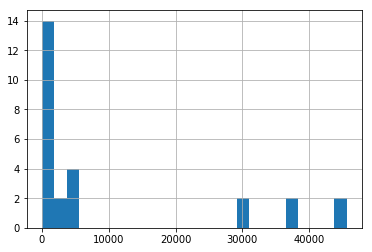

In [7]:
#check population histogram
df['Population'].hist(bins=25)

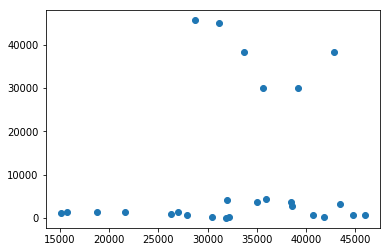

In [8]:
#check relationship between GDP and Population
import matplotlib.pyplot as plt
plt.scatter(df['GDP'], df['Population'])
plt.show() 

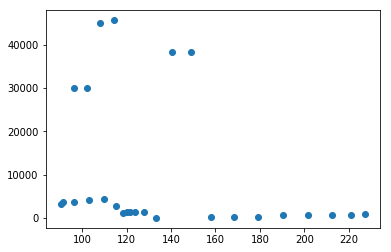

In [9]:
#check relationship between Density and Population
plt.scatter(df['Density'], df['Population'])
plt.show() 

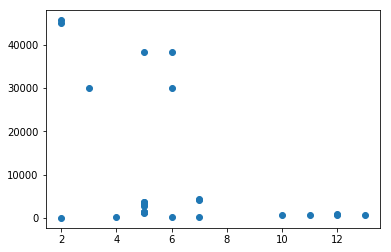

In [10]:
#check relationship between No of country and Population
plt.scatter(df['No of country'], df['Population'])
plt.show() 

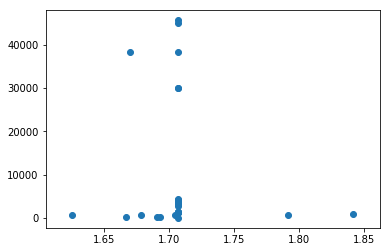

In [11]:
#check relationship between GPI and Population
plt.scatter(df['GPI'], df['Population'])
plt.show() 

In [12]:
#check GDP and Population linear relationship
feature_cols = ['GDP']
X = df[feature_cols]
y = df.Population
lm = LinearRegression()
lm.fit(X, y)

# print the coefficients
print("Intercept: ",lm.intercept_)
print("Coefficient: ",lm.coef_)

#check R squared value
print("R squared value: ",lm.score(X, y))

Intercept:  2451.26324085
Coefficient:  [ 0.2305208]
R squared value:  0.0156879360503


In [13]:
#check Density and Population linear relationship
feature_cols = ['Density']
X = df[feature_cols]
y = df.Population
lm = LinearRegression()
lm.fit(X, y)

# print the coefficients
print("Intercept: ",lm.intercept_)
print("Coefficient: ",lm.coef_)

#check R squared value
print("R squared value: ",lm.score(X, y))

Intercept:  26243.5736496
Coefficient:  [-116.42221529]
R squared value:  0.0963957884065


In [14]:
#check No of Country and Population linear relationship
feature_cols = ['No of country']
X = df[feature_cols]
y = df.Population
lm = LinearRegression()
lm.fit(X, y)

# print the coefficients
print("Intercept: ",lm.intercept_)
print("Coefficient: ",lm.coef_)

#check R squared value
print("R squared value: ",lm.score(X, y))

Intercept:  23705.5392157
Coefficient:  [-2222.13137255]
R squared value:  0.184681924377


In [15]:
# include all variables to build a model
X = df[['GDP', 'Density', 'No of country','GPI']]
y = df.Population

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state=0)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE-Root Mean Squared Error
print("RMSE Score: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#MAE is the mean of the absolute value of the errors:
print("MAE Score: ",metrics.mean_absolute_error(y_test, y_pred))

#MSE is the mean of the squared errors:
print("MSE Score: ",metrics.mean_squared_error(y_test, y_pred))

#check R squared value
print("R squared value: ",lm2.score(X,y))

RMSE Score:  11833.3231667
MAE Score:  10059.7890337
MSE Score:  140027537.167
R squared value:  0.242100812783


In [16]:
# include all variables to build a model
X = df[['GDP', 'Density', 'No of country']]
y = df.Population

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state=0)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE-Root Mean Squared Error
print("RMSE Score: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#MAE is the mean of the absolute value of the errors:
print("MAE Score: ",metrics.mean_absolute_error(y_test, y_pred))

#MSE is the mean of the squared errors:
print("MSE Score: ",metrics.mean_squared_error(y_test, y_pred))

#check R squared value
print("R squared value: ",lm2.score(X,y))

RMSE Score:  11770.231203
MAE Score:  10024.1776721
MSE Score:  138538342.573
R squared value:  0.242794148711


In [17]:
# include all variables to build a model
X = df[['GDP', 'Density']]
y = df.Population

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state=0)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE-Root Mean Squared Error
print("RMSE Score: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#MAE is the mean of the absolute value of the errors:
print("MAE Score: ",metrics.mean_absolute_error(y_test, y_pred))

#MSE is the mean of the squared errors:
print("MSE Score: ",metrics.mean_squared_error(y_test, y_pred))

#check R squared value
print("R squared value: ",lm2.score(X,y))

RMSE Score:  14122.074061
MAE Score:  11776.8470627
MSE Score:  199432975.785
R squared value:  0.11344467475


In [18]:
# include all variables to build a model
X = df[['Density', 'No of country']]
y = df.Population

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state=0)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE-Root Mean Squared Error
print("RMSE Score: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#MAE is the mean of the absolute value of the errors:
print("MAE Score: ",metrics.mean_absolute_error(y_test, y_pred))

#MSE is the mean of the squared errors:
print("MSE Score: ",metrics.mean_squared_error(y_test, y_pred))

#check R squared value
print("R squared value: ",lm2.score(X,y))

RMSE Score:  13332.202962
MAE Score:  11516.972733
MSE Score:  177747635.821
R squared value:  0.181869478716


In [19]:
#predict the GDP for future using a linear model with Year
from sklearn import linear_model
X = df[['Year']]
y = df[['GDP']]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.33, random_state=42)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

#R squared value
print("R squared value: ",lm2.score(X,y))

# Predict
pred_Den = [0,0,0,0,0,0]
for i in range (0,6):
    pred_Den[i] = lm2.predict(2017+i)

for i in range(0,6):
    print("Predicted GDP for year: ",(2017+i),pred_Den[i])
lm2.predict(2016)      

R squared value:  -0.0181228369215
Predicted GDP for year:  2017 [[ 34705.91866987]]
Predicted GDP for year:  2018 [[ 34746.99352297]]
Predicted GDP for year:  2019 [[ 34788.06837607]]
Predicted GDP for year:  2020 [[ 34829.14322917]]
Predicted GDP for year:  2021 [[ 34870.21808226]]
Predicted GDP for year:  2022 [[ 34911.29293536]]


array([[ 34664.84381677]])

In [20]:
#predict the Density for future using a linear model with Year
from sklearn import linear_model
X = df[['Year']]
y = df[['Density']]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.33, random_state=42)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

#R squared value
print("R squared value: ",lm2.score(X,y))

# Predict
pred_Den = [0,0,0,0,0,0]
for i in range (0,6):
    pred_Den[i] = lm2.predict(2017+i)

for i in range(0,6):
    print("Predicted Density for year: ",(2017+i),pred_Den[i])
lm2.predict(2016)      

R squared value:  0.839191829067
Predicted Density for year:  2017 [[ 210.41171875]]
Predicted Density for year:  2018 [[ 215.91419271]]
Predicted Density for year:  2019 [[ 221.41666667]]
Predicted Density for year:  2020 [[ 226.91914062]]
Predicted Density for year:  2021 [[ 232.42161458]]
Predicted Density for year:  2022 [[ 237.92408854]]


array([[ 204.90924479]])

In [21]:
#predict the No of country for future using a linear model with Year
from sklearn import linear_model
X = df[['Year']]
y = df[['No of country']]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.33, random_state=42)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

#R squared value
print("R squared value: ",lm2.score(X,y))

# Predict
pred_Den = [0,0,0,0,0,0]
for i in range (0,6):
    pred_Den[i] = lm2.predict(2017+i)

for i in range(0,6):
    print("Predicted No of country for year: ",(2017+i),pred_Den[i])
lm2.predict(2016)      

R squared value:  0.494922386951
Predicted No of country for year:  2017 [[ 9.03966346]]
Predicted No of country for year:  2018 [[ 9.26342147]]
Predicted No of country for year:  2019 [[ 9.48717949]]
Predicted No of country for year:  2020 [[ 9.7109375]]
Predicted No of country for year:  2021 [[ 9.93469551]]
Predicted No of country for year:  2022 [[ 10.15845353]]


array([[ 8.81590545]])

In [22]:
# Forecasted Population of Kazakhstan
X = df[['No of country','Density']]
y = df.Population

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state=0)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)


var_2017 = [[9.03966346,210.41171875]]
var_2018 = [[9.26342147,215.91419271]]
var_2019 = [[9.48717949,221.41666667]]                               
var_2020 = [[9.7109375,226.91914062]]
var_2021 = [[9.93469551,232.42161458]]
var_2022 = [[10.15845353,237.92408854]]

print("Predicted Population for year 2017: ",lm2.predict(var_2017))
print("Predicted Population for year 2018: ",lm2.predict(var_2018))
print("Predicted Population for year 2019: ",lm2.predict(var_2019))
print("Predicted Population for year 2020: ",lm2.predict(var_2020))
print("Predicted Population for year 2021: ",lm2.predict(var_2021))
print("Predicted Population for year 2022: ",lm2.predict(var_2022))



Predicted Population for year 2017:  [ 3260.21865225]
Predicted Population for year 2018:  [ 2750.4918606]
Predicted Population for year 2019:  [ 2240.76504911]
Predicted Population for year 2020:  [ 1731.03825758]
Predicted Population for year 2021:  [ 1221.31146592]
Predicted Population for year 2022:  [ 711.58465443]


In [23]:
lm2.predict([[8.81590545,204.90924479]])

array([ 3769.9454439])